# 二项分布

Text(0, 0.5, 'cdf')

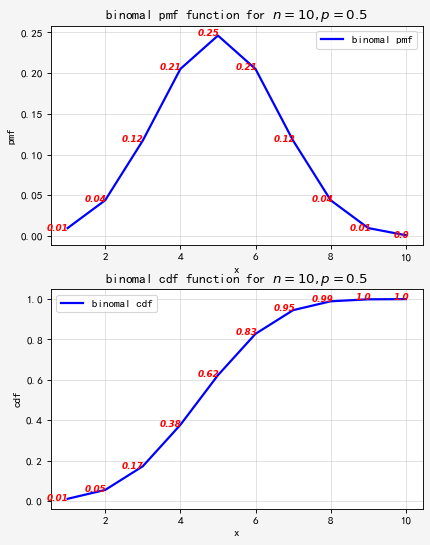

In [22]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

binom_x = np.arange(1,11,1)
binom_y = stats.binom.pmf(binom_x,10,0.5)
binom_y_cdf = stats.binom.cdf(binom_x,10,0.5)

fig = plt.figure(figsize=(6,8),dpi=80,
                 facecolor='whitesmoke',
                 edgecolor='grey')
ax1 = plt.subplot(2,1,1)
ax1.plot(binom_x,binom_y,lw=2,ls='-', color='blue',
        label='binomal pmf')
for i in range(len(binom_x)):
    ax1.text(1.01*binom_x[i],1.01*binom_y[i], np.around(binom_y[i],decimals=2),
            fontsize=8, color='red', style='italic', weight='bold',
            verticalalignment='center', horizontalalignment='right', rotation=0)
ax1.legend()
ax1.grid(alpha=0.4)
ax1.set_title("binomal pmf function for $n=10, p=0.5$")
ax1.set_xlabel('x')
ax1.set_ylabel('pmf')

ax2 = plt.subplot(2,1,2)
ax2.plot(binom_x,binom_y_cdf,lw=2,ls='-', color='blue',
        label='binomal cdf')
for i in range(len(binom_x)):
    ax2.text(1.01*binom_x[i],1.01*binom_y_cdf[i], np.around(binom_y_cdf[i],decimals=2),
            fontsize=8, color='red', style='italic', weight='bold',
            verticalalignment='center', horizontalalignment='right', rotation=0)
ax2.legend()
ax2.grid(alpha=0.4)
ax2.set_title("binomal cdf function for $n=10, p=0.5$")
ax2.set_xlabel('x')
ax2.set_ylabel('cdf')

# 泊松分布

离散随机变量
$$
P\{x \le k\} = \frac{e^{-\mu}{\mu}^{x}}{k!}
$$

Fontconfig warning: ignoring UTF-8: not a valid region tag


Text(0.5, 1.0, 'Poisson CDF')

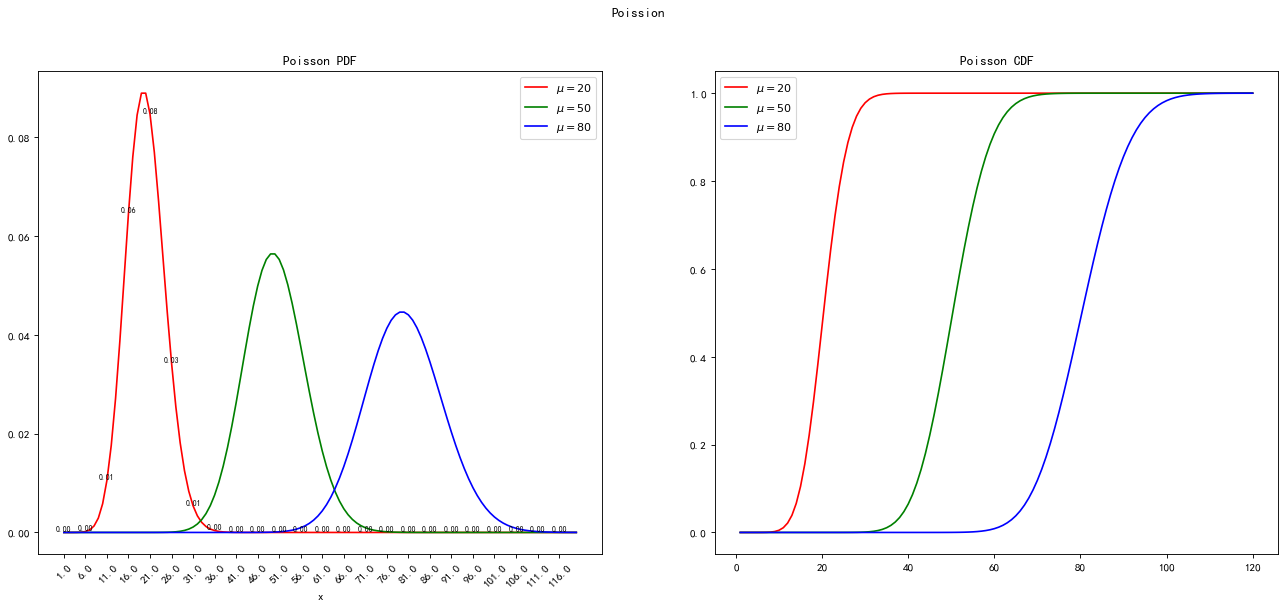

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import e

def factorial(x):
    if x == 1:
        return 1
    else:
        return x * factorial(x-1)

def mat_factorial(x):
    list = []
    for i in range(len(x)):
        list.append(np.prod(x[:i+1]))
    return list

def accumulate(x):
    list = []
    for i in range(len(x)):
        list.append(np.sum(x[:i]))
    return list

x = np.arange(1,121,1,dtype='float64')
u1 = 20
u2 = 50
u3 = 80

def cal_poisson(u,x):
    m = np.array(mat_factorial(x))
    y0 = np.power(u,x)/ m
    y1 = np.power(e,-u)*y0
    y2 = accumulate(y1)
    return [y1,y2]

fig,axes = plt.subplots(1,2,figsize=(20,8),dpi=80)
ax1 = axes[0]
ax2 = axes[1]

fig.suptitle("Poission")
ax1.plot(x,cal_poisson(u1,x)[0],label=r"$\mu=20$",color='red')
ax1.plot(x,cal_poisson(u2,x)[0],label=r"$\mu=50$",color='green')
ax1.plot(x,cal_poisson(u3,x)[0],label=r"$\mu=80$",color='blue')
ax1.set_title("Poisson PDF")
ax1.set_xticks(x[::5])
ax1.set_xticklabels(x[::5], rotation='45')
ax1.set_xlabel('x')
for a,b in zip(x[::5],cal_poisson(u1,x)[0][::5]):
    ax1.text(a,b,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=7)
ax1.legend()

ax2.plot(x,cal_poisson(u1,x)[1],label=r"$\mu=20$",color='red')
ax2.plot(x,cal_poisson(u2,x)[1],label=r"$\mu=50$",color='green')
ax2.plot(x,cal_poisson(u3,x)[1],label=r"$\mu=80$",color='blue')
ax2.legend()
ax2.set_title("Poisson CDF")

# t分布

/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


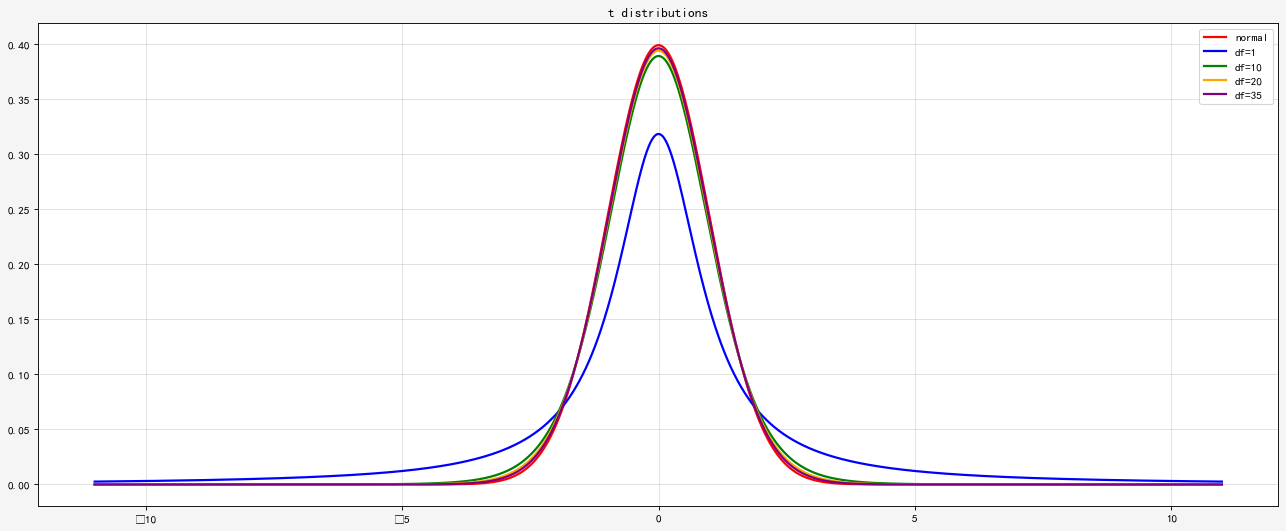

In [2]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt

x = np.arange(-11,11,0.01)
normal = norm.pdf(x)
t_1 = t.pdf(x,1)
t_2 = t.pdf(x,10)
t_3 = t.pdf(x,20)
t_4 = t.pdf(x,35)

fig = plt.figure(num='t-dis',facecolor='whitesmoke', edgecolor='grey', figsize=(20,8),dpi=80)
#fig, axes = plt.subplots(1,2)
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x, normal, lw=2, ls='-', color='red', label='normal')
ax1.plot(x, t_1, lw=2, ls='-', color='blue',label='df=1')
ax1.plot(x, t_2, lw=2, ls='-', color='green',label='df=10')
ax1.plot(x, t_3, lw=2, ls='-', color='orange',label='df=20')
ax1.plot(x, t_4, lw=2, ls='-', color='purple',label='df=35')
ax1.set_title('t distributions')
plt.gca().legend()
plt.gca().grid(alpha=0.4)

# 正态分布

## 分布公式
$$ N ~ (\mu,\sigma^2) $$

$$
    f(x) = \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{{(x-\mu)}^2}{2\sigma^2})
$$

## 正态性检验
1. 直方图
2. Q-Q图

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设定中文显示字体以及负号显示字体
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# 从xlsx中读取数据
data = pd.read_excel('./archive/年龄_收入.xlsx')
data.head(10)

,调查编号,年龄,收入
0,1,49,3553
1,2,43,4915
2,3,36,4216
3,4,54,4448
4,5,35,2170
5,6,50,3192
6,7,34,3866
7,8,47,4673
8,9,40,4411
9,10,42,2233


### 直方图

(array([  2.,   3.,  10.,  13.,  32.,  44.,  71., 103., 117., 142., 146.,
        109.,  82.,  45.,  41.,  26.,   8.,   4.,   0.,   2.]),
 array([10. , 13.1, 16.2, 19.3, 22.4, 25.5, 28.6, 31.7, 34.8, 37.9, 41. ,
        44.1, 47.2, 50.3, 53.4, 56.5, 59.6, 62.7, 65.8, 68.9, 72. ]),
 <BarContainer object of 20 artists>)

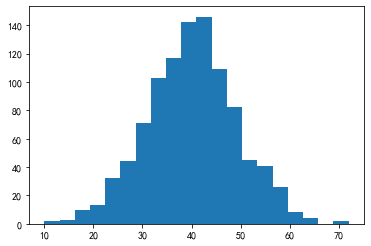

In [4]:
plt.hist(data['年龄'],bins=20)

/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='年龄', ylabel='Density'>

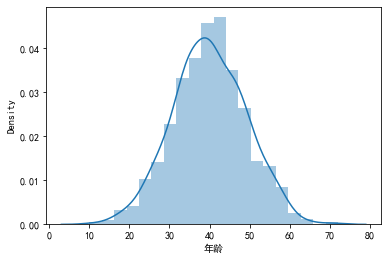

In [13]:
plt.rcParams['font.sans-serif'] = 'SimHei'
sns.distplot(data.年龄,bins=20)

(array([369., 305., 101.,  82.,  21.,  23.,  12.,  24.,  20.,  22.,   1.,
          3.,   2.,   2.,   1.,   3.,   3.,   3.,   1.,   2.]),
 array([ 2003. ,  6788.7, 11574.4, 16360.1, 21145.8, 25931.5, 30717.2,
        35502.9, 40288.6, 45074.3, 49860. , 54645.7, 59431.4, 64217.1,
        69002.8, 73788.5, 78574.2, 83359.9, 88145.6, 92931.3, 97717. ]),
 <BarContainer object of 20 artists>)

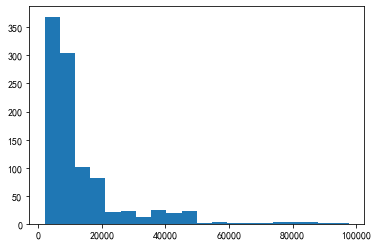

In [6]:
plt.hist(data['收入'],bins=20)

/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='收入', ylabel='Density'>

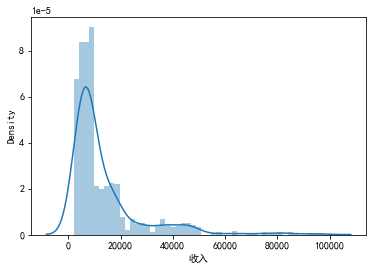

In [12]:
sns.distplot(data.收入)

### 字体不显示错误
1. 首先下载SimHei字体
2. 其次寻找matplotlib存储字体的位置，然后复制
3. 再次寻找配置文件，修改font.sans-serif项，添加SimHei字体，一定要在Arial前面，防止rollback
4. 最后删除matplotlib中的字体缓存

In [ ]:
import matplotlib

print(matplotlib.matplotlib_fname())
print(matplotlib.get_cachedir())

### Q-Q图

In [16]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#### stats probplot

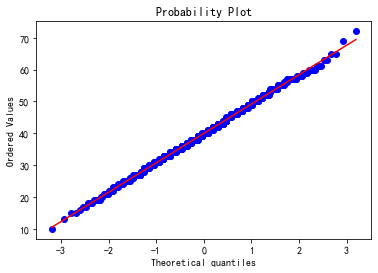

In [18]:
# 使用api绘制Q-Q图
stats.probplot(data.年龄, dist='norm', plot=plt)
plt.show()

#### statsmodels qqplot

/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


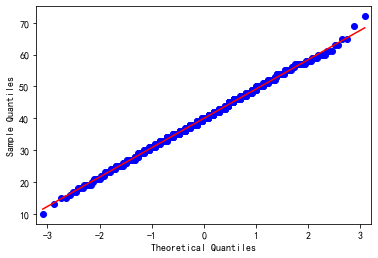

In [20]:
import statsmodels.api as sm
import pylab

sm.qqplot(data.年龄, line='s')
pylab.show()

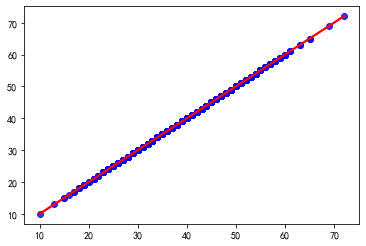

In [23]:
ls1 = sorted(data['年龄'].values)
ls2 = sorted(data['年龄'].values)
sns.regplot(x=pd.Series(ls1),y=pd.Series(ls2),ci=None,color='blue',line_kws={'color':'r'})
plt.show()

#### numpy percentile + seaborn regplot

<AxesSubplot:>

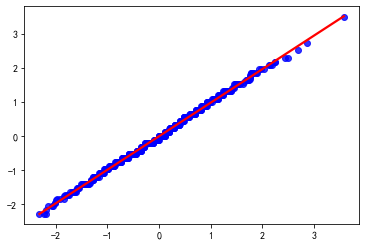

In [42]:
from scipy.stats import norm
'''
input: raw data - numpy array like data
output: standardized list - python list
'''
def normalization(data):
    mean = np.mean(data)
    std = np.std(data)
    return [(i - mean)/std for i in data]

norm_y = normalization(data.年龄)
norm_x = np.random.randn(1000)
ls1 = sorted([np.percentile(pd.Series(norm_x),i) for i in np.linspace(1,100,500)],
             reverse=True)
ls2 = sorted([np.percentile(pd.Series(norm_y),i) for i in np.linspace(1,100,500)],
             reverse=True)
sns.regplot(x=pd.Series(ls1),y=pd.Series(ls2),
            ci=None, color='b', line_kws={'color':'red'})

### K-S 检验 - >5000

In [44]:
from scipy.stats import kstest

kstest(data.年龄, cdf='norm')

KstestResult(statistic=1.0, pvalue=0.0)

### W检验 - <50

In [45]:
from scipy.stats import shapiro

shapiro(data.年龄)

ShapiroResult(statistic=0.9982743859291077, pvalue=0.4169712960720062)

### 偏度-峰度检验

In [46]:
from scipy.stats import normaltest

normaltest(data.年龄)

NormaltestResult(statistic=0.08783903718942755, pvalue=0.9570309775716397)

### J-B检验 - >8

In [52]:
from scipy.stats import jarque_bera

jarque_bera(data.年龄)

Jarque_beraResult(statistic=0.14198019503579645, pvalue=0.9314711159579767)